## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [39]:
# For SATORI based interactions
#df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [40]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [41]:
df.shape

(1592, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [42]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [43]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [44]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)

In [45]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
1,filter0<-->filter4,3,M0891_1.02,0.042392,M0607_1.02,0.001118,164.0,40.0,108.0,262.0,0.001760,0.010727,TLX2,KDM2B
4,filter0<-->filter9,8,M0891_1.02,0.042392,M0607_1.02,0.008920,351.0,257.0,121.0,207.0,0.002501,0.014060,TLX2,KDM2B
6,filter0<-->filter12,11,M0891_1.02,0.042392,M0891_1.02,0.039711,172.0,61.0,85.0,201.0,0.001827,0.011036,TLX2,TLX2
7,filter0<-->filter13,12,M0891_1.02,0.042392,M0607_1.02,0.021796,8.0,147.0,108.0,275.0,0.006823,0.030485,TLX2,KDM2B
25,filter0<-->filter42,41,M0891_1.02,0.042392,M0891_1.02,0.001225,158.0,47.0,127.0,296.0,0.009039,0.037799,TLX2,TLX2


In [46]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [47]:
df = df[df['TF1']!=df['TF2']]

In [48]:
df.shape

(1447, 15)

In [49]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [50]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [51]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter4,3,M0891_1.02,0.042392,M0607_1.02,0.001118,164.0,40.0,108.0,262.0,0.001760,0.010727,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B
1,filter0<-->filter9,8,M0891_1.02,0.042392,M0607_1.02,0.008920,351.0,257.0,121.0,207.0,0.002501,0.014060,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B
2,filter0<-->filter13,12,M0891_1.02,0.042392,M0607_1.02,0.021796,8.0,147.0,108.0,275.0,0.006823,0.030485,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B
3,filter0<-->filter65,64,M0891_1.02,0.042392,M0607_1.02,0.004762,217.0,68.0,99.0,187.0,0.007271,0.031982,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B
4,filter0<-->filter66,65,M0891_1.02,0.042392,M0747_1.02,0.011994,260.0,27.0,61.0,232.0,0.000823,0.005968,TLX2,FOXK2,TLX2$\longleftrightarrow$FOXK2


In [52]:
df.shape

(1447, 15)

## Most Frequent TF Family Interactions

In [53]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [54]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [55]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [56]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter4,3,M0891_1.02,0.042392,M0607_1.02,0.001118,164.0,40.0,108.0,262.0,0.001760,0.010727,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
1,filter0<-->filter9,8,M0891_1.02,0.042392,M0607_1.02,0.008920,351.0,257.0,121.0,207.0,0.002501,0.014060,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
2,filter0<-->filter13,12,M0891_1.02,0.042392,M0607_1.02,0.021796,8.0,147.0,108.0,275.0,0.006823,0.030485,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
3,filter0<-->filter65,64,M0891_1.02,0.042392,M0607_1.02,0.004762,217.0,68.0,99.0,187.0,0.007271,0.031982,TLX2,KDM2B,TLX2$\longleftrightarrow$KDM2B,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
4,filter0<-->filter66,65,M0891_1.02,0.042392,M0747_1.02,0.011994,260.0,27.0,61.0,232.0,0.000823,0.005968,TLX2,FOXK2,TLX2$\longleftrightarrow$FOXK2,Homeodomain,Forkhead,Homeodomain$\longleftrightarrow$Forkhead


### Distribution of individual TF or TF family interactions

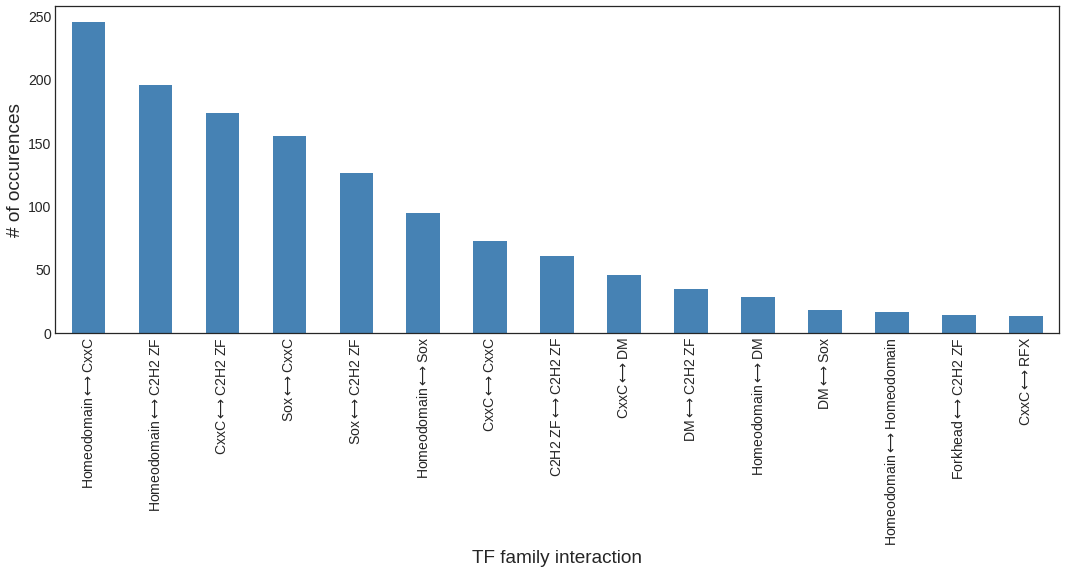

In [57]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

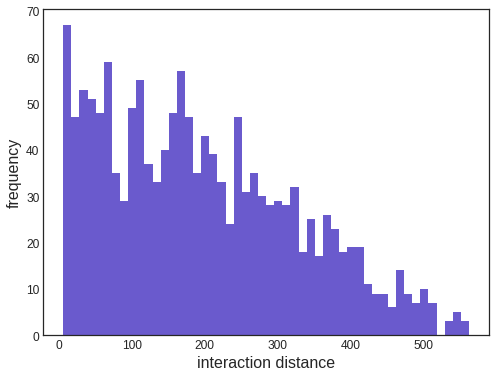

In [58]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [59]:
df['mean_distance'].mean(), df['mean_distance'].median()

(196.70905321354527, 177.0)

### Most frequent interactions and their respective interaction distances

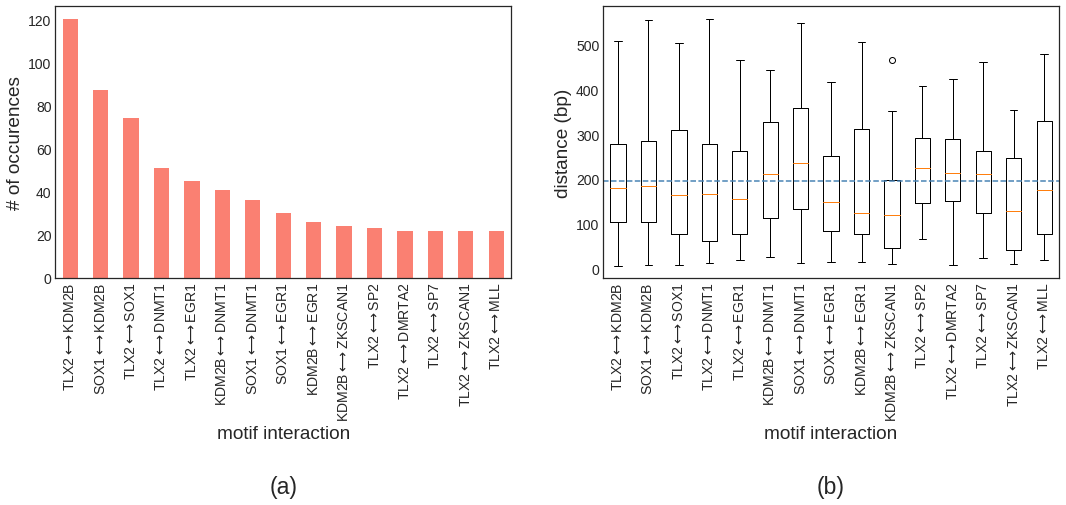

In [60]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True)

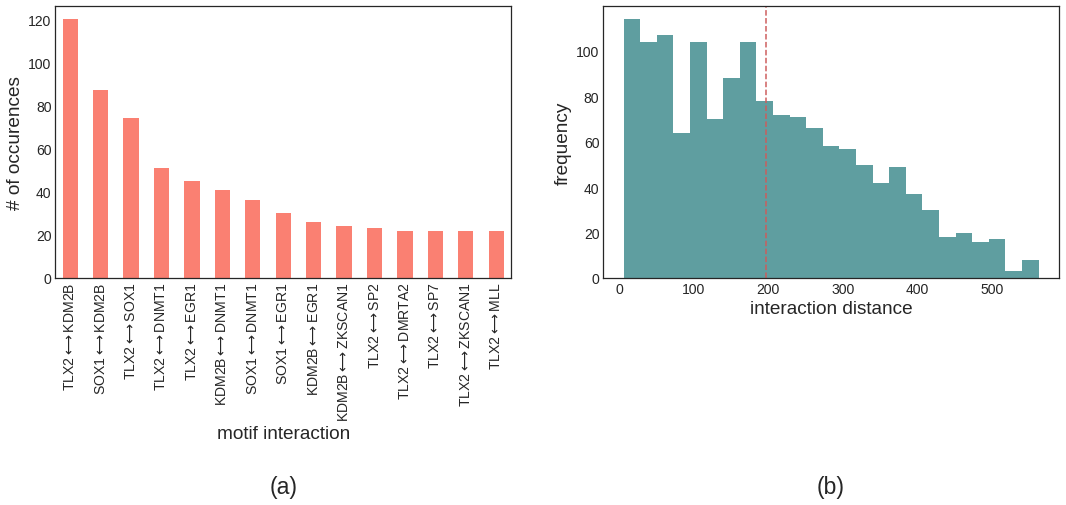

In [61]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True)

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [62]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [63]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [64]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [65]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
1442,EGR1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,7.890051e-07
1245,DNMT1$\longleftrightarrow$FOXO1,CxxC,Forkhead,1.002374e-04
1152,EGR1$\longleftrightarrow$LCOR,Pipsqueak,C2H2 ZF,1.148116e-04
1154,LCOR$\longleftrightarrow$DNMT1,Pipsqueak,CxxC,1.988870e-04
1081,EGR1$\longleftrightarrow$FOXO1,C2H2 ZF,Forkhead,9.672271e-04
683,FOXK2$\longleftrightarrow$EGR1,Forkhead,C2H2 ZF,4.271057e-03


### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [66]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/Protein-interactions/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [67]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [68]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [69]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [70]:
df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
1240,KDM2B$\longleftrightarrow$DNMT1,CxxC,CxxC,2.112602e-08
1012,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,8.894973e-05
1245,DNMT1$\longleftrightarrow$FOXO1,CxxC,Forkhead,1.002374e-04
1154,LCOR$\longleftrightarrow$DNMT1,Pipsqueak,CxxC,1.988870e-04
820,SP7$\longleftrightarrow$IRF3,C2H2 ZF,IRF,2.645675e-04
1147,KDM2B$\longleftrightarrow$LCOR,Pipsqueak,CxxC,6.985302e-04
1081,EGR1$\longleftrightarrow$FOXO1,C2H2 ZF,Forkhead,9.672271e-04
688,FOXK2$\longleftrightarrow$DNMT1,Forkhead,CxxC,1.670364e-02
235,KDM2B$\longleftrightarrow$FOXK2,CxxC,Forkhead,2.413060e-02
